# Лабороторная работа №5. Эвристические алгоритмы.

## Вариант 11 

#### Задание 1:  Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа.

#### а) Используя волновой алгоритм вручную построить оптимальный путь через лабиринт.

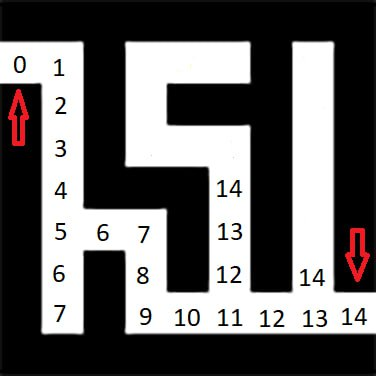

In [6]:
from IPython.display import Image
Image(filename='Desktop/limb1.jpg')

#### б) Используя маршрутный алгоритм вручную построить оптимальный путь через лабиринт.

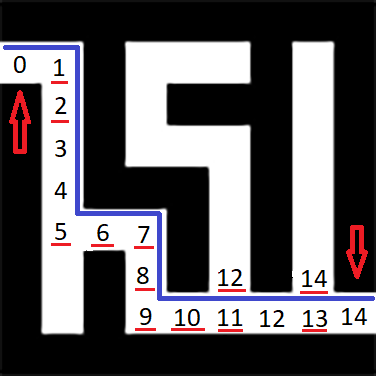

In [4]:
from IPython.display import Image
Image(filename='Desktop/limb2.png')

Расстояние от старта: У нас возможных для перемещения 2 клетки: 1 и 2, расстояние до финиша от 2 клетки меньше поэтому перемещаемся на 2.

Далее единственным образом перемещаемся до 4 клетки

Расстояние от 5 клетки (возможные варианты: 5, 6): Расстояние от 6 до финиша меньше, поэтому идем в 6.

Расстояние от 6 клетки (возможные варианты: 7, 8): Расстояние от 8 до финиша меньше, поэтому идем в 8.

Расстояние от 8 клетки (возможные варианты: 9, 10): Расстояние от 10 до финиша меньше, поэтому идем в 10.

Расстояние от 10 клетки (возможные варианты: 11, 12): Расстояние от 11 до финиша меньше, поэтому идем в 11.

Далее единственным образом перемещаемся до 12 клетки

Расстояние от 12 клетки (возможные варианты: 13, 14): Расстояние от 13 до финиша меньше, поэтому идем в 13.

В 13 клетке уже соседняя клетка является финишом, поэтому просто идем к финишу.

### Задание 2: дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа. Реализовав алгоритм в соответствии с заданием построить оптимальный путь через лабиринт.

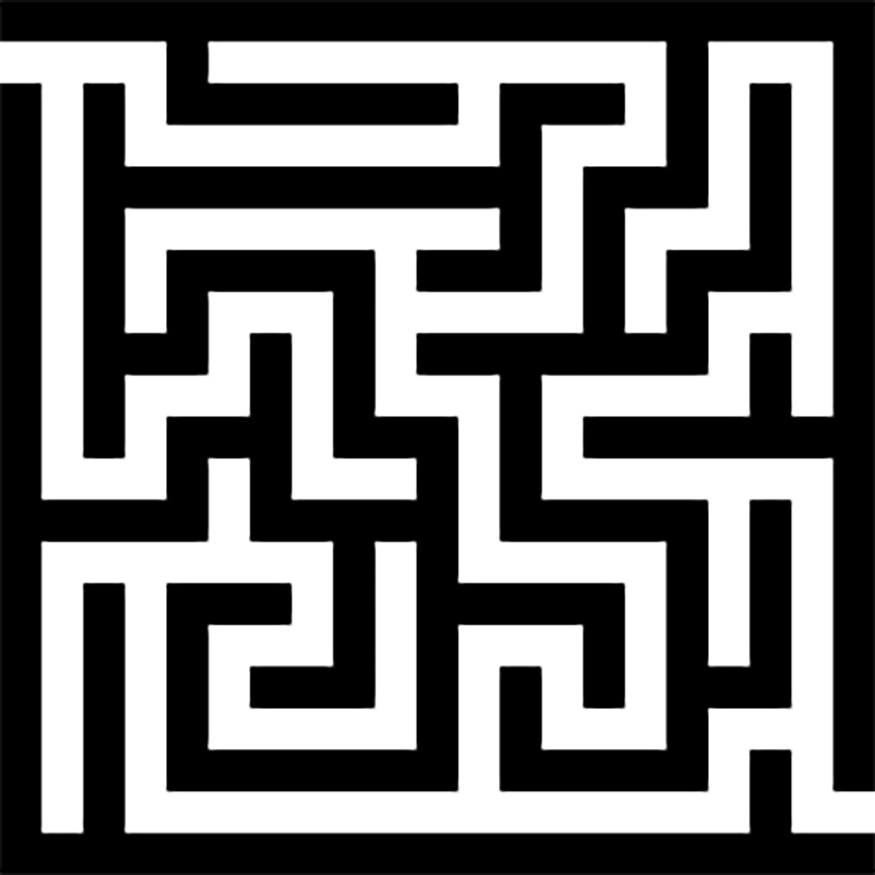

In [18]:
from IPython.display import Image
Image(filename='Desktop/limb03.png')

In [19]:
from PIL import Image

# Открываем изображение
img = Image.open("Desktop/limb03.png")
image = img.resize((21, 21))
#image.show()
bw_image = image.convert("L")
width, height = bw_image.size
matrix = [[False for _ in range(width)] for _ in range(height)]
for y in range(height):
    for x in range(width):
        pixel = bw_image.getpixel((x, y))
        if pixel > 127:
            matrix[y][x] = True

for i in matrix:
    print('[', end="")
    for j in i:
        if j:
            print("' ', ", end="")
        else:
            print("'#', ", end="")
    print('],', end="")
    print()

['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', ],
[' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ],
['#', ' ', '#', ' ', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', ],
['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ],
['#', ' ', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', ],
['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ],
['#', ' ', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#', ],
['#', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ],
['#', ' ', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', ],
['#', ' ', '#', ' '

In [24]:
def ManhattanDist(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return abs(x1 - x2) + abs(y1 - y2)

def FindPath(limb, start, fin):
    rows = len(limb)
    cols = len(limb[0])


    distances = [[float('inf') for _ in range(cols)] for _ in range(rows)]
    distances[start[0]][start[1]] = 0


    queue = [start]
    while queue:
        current = queue.pop(0)
        x, y = current
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
        for neighbor in neighbors:
            nx, ny = neighbor
            if 0 <= nx < rows and 0 <= ny < cols and limb[nx][ny] != '#' and distances[nx][ny] == float('inf'):
                distances[nx][ny] = distances[x][y] + ManhattanDist(current, neighbor)
                queue.append((nx, ny))


    path = [fin]
    current = fin
    while current != start:
        x, y = current
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
        min_distance = float('inf')
        next_cell = None
        for neighbor in neighbors:
            nx, ny = neighbor
            if 0 <= nx < rows and 0 <= ny < cols and limb[nx][ny] != '#' and distances[nx][ny] < min_distance:
                min_distance = distances[nx][ny]
                next_cell = (nx, ny)
        path.insert(0, next_cell)
        current = next_cell

    print("Маршрут построен!:", path, '\n')

    return path

limb = [['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
        [' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', ' ', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', '#', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', '#', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', '#', '#'],
        ['#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#'],
        ['#', '#', '#', '#', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', ' ', '#'],
        ['#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#', ' ', '#', ' ', '#', ' ', '#', '#', '#', ' ', '#'],
        ['#', ' ', '#', ' ', '#', ' ', ' ', ' ', ' ', ' ', '#', ' ', '#', ' ', ' ', ' ', '#', ' ', ' ', ' ', '#'],
        ['#', ' ', '#', ' ', '#', '#', '#', '#', '#', '#', '#', ' ', '#', '#', '#', '#', '#', ' ', '#', ' ', '#'],
        ['#', ' ', '#', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '#', ' ', ' '],
        ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],]

start = (1, 0)
fin = (19, 20)


path = FindPath(limb, start, fin)


for i in range(len(limb)):
    for j in range(len(limb[0])):
        if (i, j) == start:
            print('X', end=' ')
        elif (i, j) == fin:
            print('--> Конец!', end=' ')
        elif (i, j) in path:
            print('.', end=' ')
        else:
            print(limb[i][j], end=' ')
    print()


Маршрут построен!: [(1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (2, 11), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 15), (3, 15), (3, 14), (3, 13), (4, 13), (5, 13), (6, 13), (7, 13), (7, 12), (7, 11), (7, 10), (7, 9), (8, 9), (9, 9), (9, 10), (9, 11), (10, 11), (11, 11), (12, 11), (13, 11), (13, 12), (13, 13), (13, 14), (13, 15), (14, 15), (15, 15), (16, 15), (17, 15), (17, 14), (17, 13), (16, 13), (15, 13), (15, 12), (15, 11), (16, 11), (17, 11), (18, 11), (19, 11), (19, 12), (19, 13), (19, 14), (19, 15), (19, 16), (19, 17), (18, 17), (17, 17), (17, 18), (17, 19), (18, 19), (19, 19), (19, 20)] 

# # # # # # # # # # # # # # # # # # # # # 
X . . . #             . . . . . #       # 
#   # . # # # # # # # . # # # . #   #   # 
#   # . . . . . . . . . # . . . #   #   # 
#   # # # # # # # # # # # . # # #   #   # 
#   #                   # . #       #   # 
#   #   # # # # #   # # # . #   # # #   # 
#   #   #       # 